In [8]:
from gensim.models import Word2Vec, KeyedVectors
from tqdm.notebook import tqdm
gt_embeddings = '../evaluation/SWOWRP_embeddings.vec'
sg_model = '../models/all_wikis_30%_sg/baseline/baseline.model'
cbow_model = '../models/all_wikis_30%/baseline/baseline.model'
gt_embeddings = KeyedVectors.load_word2vec_format(gt_embeddings, binary=False)
sg_model = Word2Vec.load(sg_model)
cbow_model = Word2Vec.load(cbow_model)

### Sample 10,000 random words

In [9]:
import random

random.seed(42)
gt_words = random.sample(gt_embeddings.index_to_key, 650) # 5% of the words in the GT embeddings
sg_words = random.sample(sg_model.wv.index_to_key, 1000) # 5% of the words in the SG embeddings
cbow_words = random.sample(cbow_model.wv.index_to_key, 1000) # 5% of the words in the CBOW embeddings
gt_other_words = [word for word in random.sample(gt_embeddings.index_to_key, 6500) if word not in gt_words]
sg_other_words = [word for word in random.sample(sg_model.wv.index_to_key, 10000) if word not in sg_words]
cbow_other_words = [word for word in random.sample(cbow_model.wv.index_to_key, 10000) if word not in cbow_words]

### Compute similarity between all pairs of words

In [10]:
def similarities(words, other_words, words_vectors):
    similarities = []
    for word in tqdm(words):
        for other_word in other_words:
            similarities.append(words_vectors.similarity(word, other_word))
    return similarities
gt_similarities = similarities(gt_words, gt_other_words, gt_embeddings)
sg_similarities = similarities(sg_words, sg_other_words, sg_model.wv)
cbow_similarities = similarities(cbow_words, cbow_other_words, cbow_model.wv)

  0%|          | 0/650 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

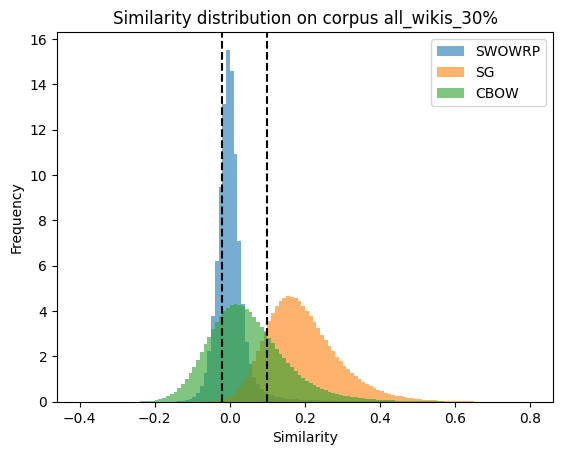

In [14]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.arange(-0.4, 0.8, 0.01)
plt.hist(gt_similarities, bins=bins, alpha=0.6, density=True, label='SWOWRP')
plt.hist(sg_similarities, bins=bins, alpha=0.6, density=True, label='SG')
plt.hist(cbow_similarities, bins=bins, alpha=0.6, density=True, label='CBOW')
plt.legend(loc='upper right')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.axvline(x=0.1, linestyle='--', color='k')
plt.axvline(x=-0.02, linestyle='--', color='k')
plt.title('Similarity distribution on corpus all_wikis_30%')
plt.savefig('../results/similarity_distribution.png')
plt.show()